# 常见需要import的包

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

import toad

In [2]:
%load_ext autoreload
%autoreload 2

# 读取数据

* 方法1 从CSV读取数据

In [3]:
DATA_DIR = Path(Path.home(), "workspace", "data")
fp_data = Path(DATA_DIR, 'tutorial', 'data.csv')

df_data = pd.read_csv(fp_data, index_col=None)

* 方法2 从数据库读取数据

In [4]:
import sqlite3

fp_data = Path(DATA_DIR, 'db', 'fintech.sqlite')

conn = sqlite3.connect(f"{fp_data}")

sql = """
    SELECT * FROM data
"""

df_data = pd.read_sql(sql, conn)

# 查看数据

In [5]:
df_data

,AppNo,Region,Area,Activity,Guarantor,Collateral,Collateral_valuation,Age,Properties_Status,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Defaulter
0,350121,10,45,2.0,0,1,3345.0,27,A,2,2356,22,1,1.0,0,0
1,350122,5,35,2.0,0,0,NaN,29,A,2,8305,23,1,1.0,0,0
2,350123,7,20,1.0,0,0,NaN,26,A,1,3380,22,1,1.0,0,0
3,350124,10,45,10.0,0,1,1141.0,61,B,1,1628,12,6,2.0,99,0
4,350125,10,25,14.0,0,1,1664.0,35,B,2,1858,11,6,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,400116,10,45,1.0,1,0,NaN,36,B,1,2882,24,2,2.0,0,0
49996,400117,10,75,14.0,0,0,NaN,22,B,1,8016,12,7,2.0,0,0
49997,400118,7,50,14.0,0,0,NaN,41,B,4,3277,23,6,5.0,0,0
49998,400119,9,87,1.0,0,1,2572.0,51,B,1,5254,36,5,1.0,33,0


In [6]:
toad.detect(df_data)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
AppNo,int64,50000,0.00%,50000,375120.5,14433.901067,350121.0,350620.99,355120.9,375120.5,387620.25,395120.1,399620.01,400120.0
Region,int64,50000,0.00%,15,9.1346,2.522406,1.0,4.0,6.0,9.0,10.0,14.0,14.0,15.0
Area,int64,50000,0.00%,21,35.36028,24.703517,5.0,5.0,5.0,30.0,50.0,75.0,95.0,95.0
Activity,float64,50000,5.16%,18,8.936527,7.017887,1.0,1.0,1.0,10.0,14.0,18.0,19.0,19.0
Guarantor,int64,50000,0.00%,2,0.08654,0.281163,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Collateral,int64,50000,0.00%,2,0.56926,0.495185,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Collateral_valuation,float64,50000,43.07%,5641,6399.752415,8155.521062,10.0,331.86,1070.0,3768.0,7589.5,14451.4,39744.02,137618.0
Age,int64,50000,0.00%,62,41.12886,10.443382,18.0,20.0,27.0,41.0,49.0,55.0,64.0,80.0
Properties_Status,object,50000,0.00%,4,B:64.00%,D:22.19%,A:12.14%,C:1.68%,NaN,NaN,B:64.00%,D:22.19%,A:12.14%,C:1.68%
Properties_Total,int64,50000,0.00%,14,1.99236,1.175521,1.0,1.0,1.0,2.0,2.0,3.0,6.0,15.0


In [7]:
num_cols = ['Collateral_valuation', 'Age', 'Properties_Total', 'Amount', 'Term', 'Historic_Loans', 'Current_Loans', 'Max_Arrears']
cat_cols = ['Region', 'Area', 'Activity', 'Guarantor', 'Collateral', 'Properties_Status']
features = num_cols + cat_cols
label = 'Defaulter'

# 样本处理

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_label = df_data[['AppNo', 'Defaulter']].copy(deep=True)

In [10]:
train, test = train_test_split(
    df_label,
    test_size=0.2,
    stratify=df_label['Defaulter'],
    random_state=20230706,
)

In [11]:
idx_train = df_label['AppNo'].isin(train['AppNo'].tolist())
idx_test = df_label['AppNo'].isin(test['AppNo'].tolist())

df_label.loc[:, "sample_type"] = "unknown"
df_label.loc[idx_train, "sample_type"] = "train"
df_label.loc[idx_test, "sample_type"] = "test"

In [12]:
df_label

,AppNo,Defaulter,sample_type
0,350121,0,train
1,350122,0,train
2,350123,0,test
3,350124,0,train
4,350125,0,train
...,...,...,...
49995,400116,0,train
49996,400117,0,train
49997,400118,0,train
49998,400119,0,train


In [13]:
df_label.groupby('sample_type').agg(total=('Defaulter', 'count'),
                                    bad=('Defaulter', 'sum'),
                                    bad_rate=('Defaulter', 'mean')).reset_index()

,sample_type,total,bad,bad_rate
0,test,10000,1644,0.164400
1,train,40000,6575,0.164375


### 处理类别特征

In [14]:
for c in cat_cols:
    df_data.loc[:, c] = df_data.loc[:, c].apply(lambda x: str(f"cat_{x}"))

In [15]:
df_sample = df_label.merge(df_data[['AppNo'] + features], on='AppNo', how='left')

In [16]:
df_sample

,AppNo,Defaulter,sample_type,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Region,Area,Activity,Guarantor,Collateral,Properties_Status
0,350121,0,train,3345.0,27,2,2356,22,1,1.0,0,cat_10,cat_45,cat_2.0,cat_0,cat_1,cat_A
1,350122,0,train,NaN,29,2,8305,23,1,1.0,0,cat_5,cat_35,cat_2.0,cat_0,cat_0,cat_A
2,350123,0,test,NaN,26,1,3380,22,1,1.0,0,cat_7,cat_20,cat_1.0,cat_0,cat_0,cat_A
3,350124,0,train,1141.0,61,1,1628,12,6,2.0,99,cat_10,cat_45,cat_10.0,cat_0,cat_1,cat_B
4,350125,0,train,1664.0,35,2,1858,11,6,2.0,0,cat_10,cat_25,cat_14.0,cat_0,cat_1,cat_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,400116,0,train,NaN,36,1,2882,24,2,2.0,0,cat_10,cat_45,cat_1.0,cat_1,cat_0,cat_B
49996,400117,0,train,NaN,22,1,8016,12,7,2.0,0,cat_10,cat_75,cat_14.0,cat_0,cat_0,cat_B
49997,400118,0,train,NaN,41,4,3277,23,6,5.0,0,cat_7,cat_50,cat_14.0,cat_0,cat_0,cat_B
49998,400119,0,train,2572.0,51,1,5254,36,5,1.0,33,cat_9,cat_87,cat_1.0,cat_0,cat_1,cat_B


In [17]:
df_train = df_sample.loc[df_sample['sample_type']=='train', :]
df_test = df_sample.loc[df_sample['sample_type']=='test', :]

# 特征分箱

### 分箱

In [18]:
combiner = toad.transform.Combiner()

In [19]:
combiner = combiner.fit(
    df_train[features + ['Defaulter']],
    y='Defaulter',
    method='dt',
    n_bins=5,
    empty_separate=True,
)

In [20]:
df_bin = combiner.transform(df_train[features + ['Defaulter']])

### WOE编码

In [21]:
woe_encoder = toad.transform.WOETransformer()

In [22]:
woe_encoder = woe_encoder.fit(df_bin, df_bin['Defaulter'], exclude=['Defaulter'])

### 对训练集和测试集一起做分享和编码

In [23]:
df_bin = combiner.transform(df_sample)
df_woe = woe_encoder.transform(df_bin)

In [24]:
df_woe

,AppNo,Defaulter,sample_type,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Region,Area,Activity,Guarantor,Collateral,Properties_Status
0,350121,0,train,-0.433486,0.437127,-0.254453,-0.542538,-0.410879,0.347084,0.051962,-0.024137,-1.272501,-0.668699,1.119082,0.004938,-0.171294,0.556711
1,350122,0,train,0.198424,0.437127,-0.254453,0.217091,-0.410879,0.347084,0.051962,-0.024137,0.801193,0.638143,1.119082,0.004938,0.198424,0.556711
2,350123,0,test,0.198424,0.437127,0.340896,-0.181792,-0.410879,0.347084,0.051962,-0.024137,0.344384,0.162058,-0.034050,0.004938,0.198424,0.556711
3,350124,0,train,-0.720590,-0.385168,0.340896,-0.542538,-0.410879,-0.214982,-0.055150,-0.170363,-1.272501,-0.668699,-0.809912,0.004938,-0.171294,-0.173579
4,350125,0,train,-0.720590,0.169726,-0.254453,-0.542538,-0.410879,-0.214982,-0.055150,-0.024137,-1.272501,-0.066568,-0.809912,0.004938,-0.171294,-0.173579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,400116,0,train,0.198424,0.169726,0.340896,-0.542538,-0.410879,0.175588,-0.055150,-0.024137,-1.272501,-0.668699,-0.034050,-0.052353,0.198424,-0.173579
49996,400117,0,train,0.198424,0.437127,0.340896,-0.181792,-0.410879,-0.214982,-0.055150,-0.024137,-1.272501,-0.668699,-0.809912,0.004938,0.198424,-0.173579
49997,400118,0,train,0.198424,-0.156102,-0.509163,-0.181792,-0.410879,-0.214982,0.250134,-0.024137,0.344384,0.162058,-0.809912,0.004938,0.198424,-0.173579
49998,400119,0,train,-0.433486,-0.385168,0.340896,-0.181792,0.375537,-0.214982,0.051962,-0.170363,0.344384,-0.066568,-0.034050,0.004938,-0.171294,-0.173579


# 使用逻辑回归构建二分类模型

In [25]:
df_train = df_woe.loc[df_woe['sample_type']=='train', :]
df_test = df_woe.loc[df_woe['sample_type']=='test', :]

###  特征筛选

In [26]:
selected, dropped = toad.selection.select(
    df_train[features + ['Defaulter']], target='Defaulter', 
    empty = 0.5, iv = 0.05, corr = 0.7, 
    return_drop=True, 
    exclude=[]
)

In [27]:
print(dropped)

{'empty': array([], dtype=float64), 'iv': array(['Current_Loans', 'Guarantor', 'Collateral'], dtype=object), 'corr': array([], dtype=object)}


In [28]:
set(features) - set()

{'Activity',
 'Age',
 'Amount',
 'Area',
 'Collateral',
 'Collateral_valuation',
 'Current_Loans',
 'Guarantor',
 'Historic_Loans',
 'Max_Arrears',
 'Properties_Status',
 'Properties_Total',
 'Region',
 'Term'}

In [29]:
selected_features = sorted(set(features) - set(dropped['empty']) - set(dropped['iv'] ) - set(dropped['corr']))

In [30]:
selected_features

['Activity',
 'Age',
 'Amount',
 'Area',
 'Collateral_valuation',
 'Historic_Loans',
 'Max_Arrears',
 'Properties_Status',
 'Properties_Total',
 'Region',
 'Term']

### 模型训练

In [31]:
import statsmodels.api as sm

In [32]:
df_xtrain_const = sm.add_constant(df_train[selected_features])

In [33]:
df_xtrain_const

,const,Activity,Age,Amount,Area,Collateral_valuation,Historic_Loans,Max_Arrears,Properties_Status,Properties_Total,Region,Term
0,1.0,1.119082,0.437127,-0.542538,-0.668699,-0.433486,0.347084,-0.024137,0.556711,-0.254453,-1.272501,-0.410879
1,1.0,1.119082,0.437127,0.217091,0.638143,0.198424,0.347084,-0.024137,0.556711,-0.254453,0.801193,-0.410879
3,1.0,-0.809912,-0.385168,-0.542538,-0.668699,-0.720590,-0.214982,-0.170363,-0.173579,0.340896,-1.272501,-0.410879
4,1.0,-0.809912,0.169726,-0.542538,-0.066568,-0.720590,-0.214982,-0.024137,-0.173579,-0.254453,-1.272501,-0.410879
6,1.0,-0.809912,-0.385168,-0.542538,0.638143,-0.720590,0.347084,-0.024137,-0.173579,-0.330279,0.344384,0.375537
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.0,-0.034050,-0.385168,0.894930,0.162058,0.198424,0.044996,-0.024137,-0.173579,-0.330279,0.344384,0.899852
49995,1.0,-0.034050,0.169726,-0.542538,-0.668699,0.198424,0.175588,-0.024137,-0.173579,0.340896,-1.272501,-0.410879
49996,1.0,-0.809912,0.437127,-0.181792,-0.668699,0.198424,-0.214982,-0.024137,-0.173579,0.340896,-1.272501,-0.410879
49997,1.0,-0.809912,-0.156102,-0.181792,0.162058,0.198424,-0.214982,-0.024137,-0.173579,-0.509163,0.344384,-0.410879


In [34]:
model = sm.Logit(df_train['Defaulter'], df_xtrain_const).fit(method="bfgs", maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.375004
         Iterations: 55
         Function evaluations: 56
         Gradient evaluations: 56


### 模型预测

In [35]:
df_woe = sm.add_constant(df_woe[selected_features])

In [36]:
df_woe['prob'] = model.predict(df_woe[["const"] + selected_features])

In [37]:
df_sample['prob'] = df_woe['prob']

### 模型评估

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
def get_auc(ytrue, yprob):
    if sum(ytrue) == 0 or sum(ytrue) == len(ytrue):
        return None

    auc = roc_auc_score(ytrue, yprob)
    if auc < 0.5:
        auc = 1 - auc
    return auc

In [40]:
df_master = df_label.merge(df_sample[['AppNo', 'prob']], on='AppNo', how='left')

In [41]:
df_master

,AppNo,Defaulter,sample_type,prob
0,350121,0,train,0.098040
1,350122,0,train,0.431697
2,350123,0,test,0.309070
3,350124,0,train,0.024299
4,350125,0,train,0.028302
...,...,...,...,...
49995,400116,0,train,0.071163
49996,400117,0,train,0.064069
49997,400118,0,train,0.051517
49998,400119,0,train,0.158310


In [42]:
df_master.groupby('sample_type').apply(lambda r: get_auc(r['Defaulter'], r['prob']))

sample_type
test     0.775691
train    0.775946
dtype: float64

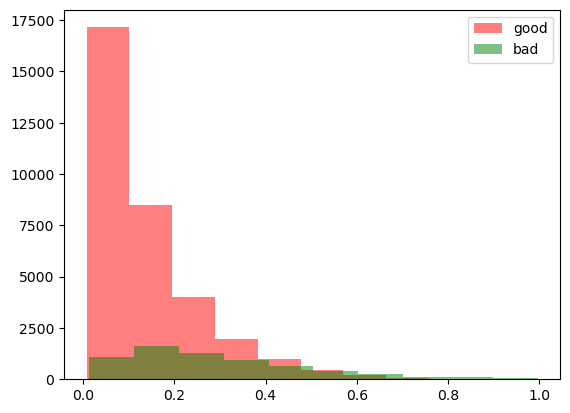

In [43]:
df_train = df_master.loc[df_master['sample_type']=='train', :]

plt.figure()
good = plt.hist(df_train.loc[df_train['Defaulter']==0, 'prob'], alpha=0.5, label='good', color='red')
bad = plt.hist(df_train.loc[df_train['Defaulter']==1, 'prob'], alpha=0.5, label='bad', color='green')
plt.legend()

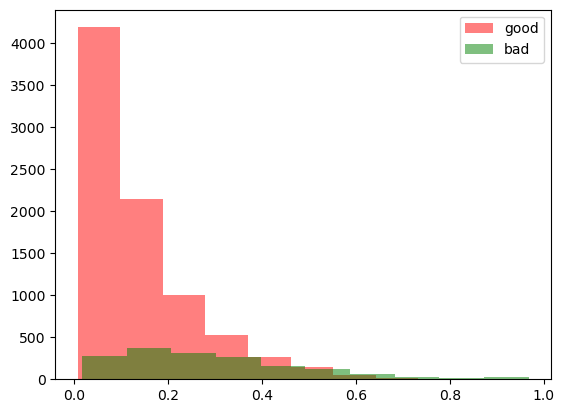

In [44]:
df_test = df_master.loc[df_master['sample_type']=='test', :]

plt.figure()
good = plt.hist(df_test.loc[df_test['Defaulter']==0, 'prob'], alpha=0.5, label='good', color='red')
bad = plt.hist(df_test.loc[df_test['Defaulter']==1, 'prob'], alpha=0.5, label='bad', color='green')
plt.legend()

# 分数映射

* 注: 这里的分数映射是简单方法 无法把分数关联到风险等级 我们后续会介绍更实战的分数映射方法

In [45]:
import math

In [46]:
def score_mapping(y):
    base = 500
    pdo = 50
    score = pdo*math.log2((1-y)/y) + base
    
    if score <0:
        score = 0
    if score > 1000:
        score = 1000
    
    return score

In [47]:
df_master['score'] = df_master['prob'].apply(lambda x: score_mapping(x))

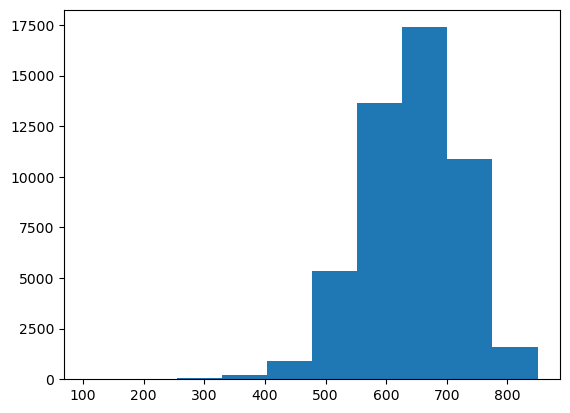

In [48]:
_, _, _ = plt.hist(df_master['score'])

In [49]:
df_master.groupby('sample_type').apply(lambda r: get_auc(r['Defaulter'], r['score']))

sample_type
test     0.775691
train    0.775946
dtype: float64

* 注: 线性变换不影响模型区分度